# Amortissement

In [55]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)
mpl.rcParams.update({
    'figure.figsize': (5, 3)
})

In [56]:
def load(filename: str):
    return pd.read_csv(filename)

In [57]:
acier_doux = load('../data/acier_doux_temp.csv')

## Plot this shit

## TODO: utiliser la formule pour Q_inv et remplacer Q_inv_auto par Q_inv_err (qui contient les uncertainties)

525.81


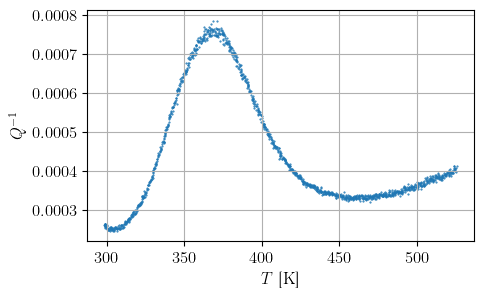

In [58]:
Q_inv_auto = acier_doux['fit_Q_1']

Q_inv = Q_inv_auto  # TODO: a changer avec le Q_inv_err

T = acier_doux['T[C]'] + 273.15  # K
print(T[len(T)-1])
plt.scatter(T, nom_vals(Q_inv), 1, marker='.')
plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$Q^{-1}$')
plt.grid()

In [59]:
# from matplotlib.path import Path
# from matplotlib.widgets import LassoSelector
# class SelectFromCollection:
#     """
#     Select indices from a matplotlib collection using `LassoSelector`.

#     Selected indices are saved in the `ind` attribute. This tool fades out the
#     points that are not part of the selection (i.e., reduces their alpha
#     values). If your collection has alpha < 1, this tool will permanently
#     alter the alpha values.

#     Note that this tool selects collection objects based on their *origins*
#     (i.e., `offsets`).

#     Parameters
#     ----------
#     ax : `~matplotlib.axes.Axes`
#         Axes to interact with.
#     collection : `matplotlib.collections.Collection` subclass
#         Collection you want to select from.
#     alpha_other : 0 <= float <= 1
#         To highlight a selection, this tool sets all selected points to an
#         alpha value of 1 and non-selected points to *alpha_other*.
#     """

#     def __init__(self, ax, collection, alpha_other=0.3):
#         self.canvas = ax.figure.canvas
#         self.collection = collection
#         self.alpha_other = alpha_other

#         self.xys = collection.get_offsets()
#         self.Npts = len(self.xys)

#         # Ensure that we have separate colors for each object
#         self.fc = collection.get_facecolors()
#         if len(self.fc) == 0:
#             raise ValueError('Collection must have a facecolor')
#         elif len(self.fc) == 1:
#             self.fc = np.tile(self.fc, (self.Npts, 1))

#         self.lasso = LassoSelector(ax, onselect=self.onselect)
#         self.ind = []

#     def onselect(self, verts):
#         path = Path(verts)
#         self.ind = np.nonzero(path.contains_points(self.xys))[0]
#         self.fc[:, -1] = self.alpha_other
#         self.fc[self.ind, -1] = 1
#         self.collection.set_facecolors(self.fc)
#         self.canvas.draw_idle()

#     def disconnect(self):
#         self.lasso.disconnect_events()
#         self.fc[:, -1] = 1
#         self.collection.set_facecolors(self.fc)
#         self.canvas.draw_idle()

In [60]:
# %matplotlib widget
# plt.close()
# fig, ax = plt.subplots(figsize=(10, 8))
# datas = (i for i in [acier_doux])
# curr = None
# deg = 2  # degré du fit
# fit_dict = {}

# def plot(data) -> SelectFromCollection:
#     pts = ax.scatter(data[0], data[1], marker=".", s=1, picker=5)
#     selector = SelectFromCollection(ax, pts)
#     return selector

# selector = None
# def load_next():
#     global selector, curr
#     try:
#         curr = 'acier_doux'
#     except StopIteration:
#         plt.close()
#         return
#     data = [T, Q_inv]
#     selector = plot(data)

# def accept(event):
#     global selector, curr
#     if event.key == "enter":
#         selected = selector.xys[selector.ind]
#         coefs, cov = np.polyfit(selected[:,0], selected[:,1], deg, cov=True)
#         coefs_err = unp.uarray(coefs, np.sqrt(np.diag(cov)))
#         if deg == 1:
#             print("Fit: ({:.1ueP})x + ({:.1ueP})".format(*coefs_err))
#         elif deg == 2:
#             print("Fit: ({:.1ueP})x^2 + ({:.1ueP})x + ({:.1ueP})".format(*coefs_err))
#         fit_dict[curr] = coefs_err
#         # Show fit
#         fit = np.poly1d(coefs)
#         x = np.linspace(np.min(selected[:,0]), np.max(selected[:,0]), 50)
#         ax.plot(x, fit(x), color="red", linewidth=1)
#         # selector.disconnect()
#         # ax.set_title("")
#         fig.canvas.draw()
#     if event.key == "escape":
#         selector.disconnect()
#         # plt.cla()
#         fit_func = np.poly1d(nom_vals(fit_dict['acier_doux']))
#         plt.scatter(T, nom_vals(Q_inv - fit_func(T)), 1, marker='.')
#         plt.xlabel(r'$T$ [\si{\kelvin}]')
#         plt.ylabel(r'$Q^{-1}$')
#         plt.grid()
    

# fig.canvas.mpl_connect("key_press_event", accept)
# ax.set_title("Press enter to accept selected points.")
# load_next()

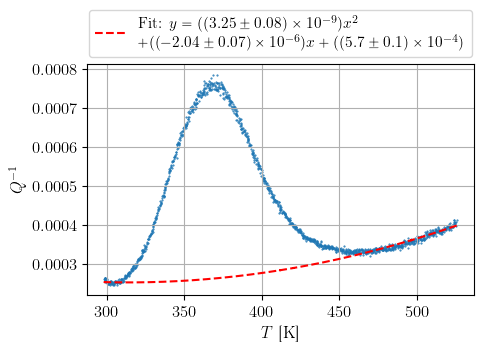

In [61]:
%matplotlib inline
plt.close()
fit_dict = {
    'acier_doux': unp.uarray(
        [
            3.248832149590669e-09,
            -2.039335349412828e-06,
            0.0005732942643662379
        ],
        [
            8.346552901423797e-11,
            6.803817632768897e-08,
            1.329352134837559e-05
        ]
    )
}

fit_func = np.poly1d(nom_vals(fit_dict['acier_doux']))
plt.scatter(T, nom_vals(Q_inv), 1, marker='.')

label = "Fit: $y = ({:.1ueL})x^2$\n$+ ({:.1ueL})x+ ({:.1ueL})$".format(*fit_dict['acier_doux'])
plt.plot(T, fit_func(T), 'r--', label=label)
plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$Q^{-1}$')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1))
plt.grid()
plt.savefig('../figures/acier_doux_q_1_temp_unadjusted.pdf')

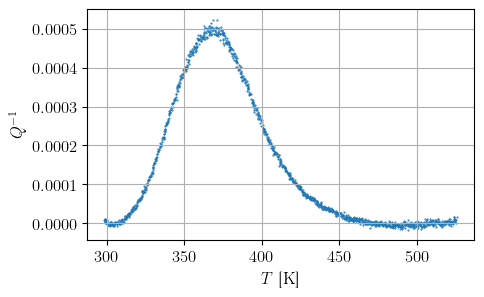

In [62]:
fit_func = np.poly1d(nom_vals(fit_dict['acier_doux']))
Q_inv_corrected = Q_inv - fit_func(T)
plt.scatter(T, nom_vals(Q_inv_corrected), 1, marker='.')
plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$Q^{-1}$')
plt.grid()

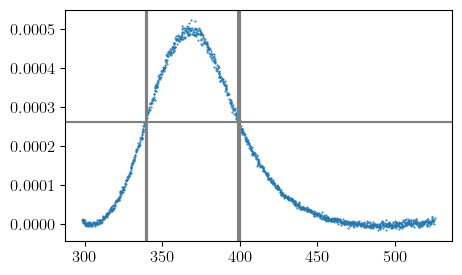

In [63]:
# Vars
# Delta = ... # LE PARAM QU'ON CHERCHE A FIT? 2 * hauteur max de Q^-1
max_idx = np.argmax(Q_inv_corrected)

# https://stackoverflow.com/questions/2652368/how-to-detect-a-sign-change-for-elements-in-a-numpy-array
Delta_2_max = Q_inv_corrected[max_idx]
offset_Q_inv = Q_inv_corrected - Delta_2_max / 2
mi_hauteur_idx = np.where(np.diff(np.sign(offset_Q_inv)) != 0)[0] + 1
# Visualise this awful shitty ass code
plt.scatter(T, Q_inv_corrected, 1, marker='.')
plt.axhline(Delta_2_max / 2)
for i in mi_hauteur_idx:
    plt.axvline(T[i])


In [64]:
T_4s = T[mi_hauteur_idx]


T_4_mins = T_4s[T_4s <= T_4s.min() +10]
T_min = T_4_mins.mean()
T_min_err = T_4_mins.max() - T_4_mins.min()
T_1 = ufloat(T_min, T_min_err)

T_4_maxs = T_4s[T_4s >= T_4s.max() -10]
T_max = T_4_maxs.mean()
T_max_err = T_4_maxs.max() - T_4_maxs.min()
T_2 = ufloat(T_max, T_max_err)


T_p = T[max_idx]   # argmax(Q_inv)

T_ps = T[Q_inv_corrected >= Q_inv_corrected[max_idx] -1e-5]
T_p_temp = T_ps.mean()
T_p_err = T_ps.max() - T_ps.min()
T_p = ufloat(T_p_temp, T_p_err)



H = 2.634 * k_boltzmann / (1/T_1 - 1/T_2)

print(mi_hauteur_idx)
print(Delta_2_max)
print(f"Tp = {T_p:.1ueP}")
print(f"T1 = {T_1:.1ueP}")
print(f"T2 = {T_2:.1ueP}")
print(f"H = {H:.1ueP}")


[244 247 248 598 599 601 602 603]
0.000522468479737626
Tp = (3.69±0.03)×10²
T1 = (3.397±0.007)×10²
T2 = (4.00±0.01)×10²
H = (8.2±0.2)×10⁻²⁰


## Now fit it

In [65]:
# def Q_inv_func(T, Delta, H_fit):
#     return Delta / (2 * np.cosh(H_fit / k_boltzmann * (1/T_p - 1/T)))

def Q_inv_func(T, Delta):
    return Delta / (2 * np.cosh(nom_vals(H) / k_boltzmann * (1/nom_vals(T_p) - 1/T)))


Delta = (9.98±0.03)×10⁻⁴
Fit: $y = \frac{\left(9.98 \pm 0.03\right) \times 10^{-4}}{2 \cosh (\left(6.0 \pm 0.1\right) \times 10^{3} ((369.1+/-3.5)^{-1} - x^{-1}))}$
1.5618893894307853e-07


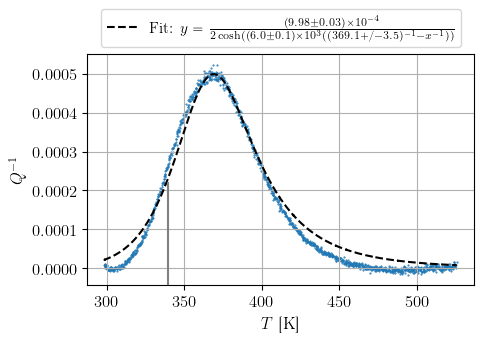

In [81]:
subset = np.arange(0, len(T))
T_subset = T[subset]
Q_inv_corrected_subset = Q_inv_corrected[subset]
coefs, cov = sc.optimize.curve_fit(Q_inv_func, T_subset, Q_inv_corrected_subset, bounds=([-np.inf], [np.inf]))
coefs_err = unp.uarray(coefs, np.sqrt(np.diag(cov)))
print(f"Delta = {coefs_err[0]:.1ueP}")
# print(f"H_fit = {coefs_err[1]:.1ueP}")

Delta_fit = coefs_err[0]
Delta_max = 2*Delta_2_max

label = r"Fit: $y = \frac{{{:.1ueL}}}{{2 \cosh ({:.1ueL} (({:.1f})^{{-1}} - x^{{-1}}))}}$".format(coefs_err[0], H/k_boltzmann, T_p)
print(label)
plt.plot(T_subset, Q_inv_func(T_subset, *coefs), 'k--', label=label)
plt.scatter(T_subset, nom_vals(Q_inv_corrected_subset), 1, marker='.')

ymin, ymax = plt.ylim()
print(Q_inv_corrected[mi_hauteur_idx[0]] * (ymax-ymin))
plt.axvline(T[mi_hauteur_idx[0]], ymax=Q_inv_corrected[mi_hauteur_idx[0]] / (ymax-ymin))

plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$Q^{-1}$')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1))
plt.grid()
plt.savefig('../figures/acier_doux_q_1_temp_adjusted.pdf')

## Calcul concentration interstitiel

In [52]:
print(f"Delta fit = {Delta_fit:.1ueP}")
print(f"Delta max = {Delta_max:.3e}")

Delta fit = (9.98±0.03)×10⁻⁴
Delta max = 1.045e-03


In [53]:
E_doux = ufloat(180, 7) * 1e9
Ju = 1 / E_doux

c0 = (9 * Delta_fit * Ju * k_boltzmann * T_p) / (2 * v_0 * Delta_lambda**2)

print(f"concentration interstitiels c0 = {c0:.1ueP}")

concentration interstitiels c0 = (1.08±0.04)×10⁻⁴
